## Task 1

In [56]:
# Identifying and importing essential libraries
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 2

In [57]:
#Load the dataset from a file
df = pd.read_excel (r'Superstore.xls')
print(df) 

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [58]:
#Look at the first 5 records of the data
df.iloc[['0','1','2','3','4']]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [59]:
#Print the columns contained in the data
for col in df.columns: 
    print(col) 

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [60]:
#Print the attributes like count , mean , max , min, standard deviation etc
print(df.Sales.describe())
print(df.Quantity.describe())
print(df.Discount.describe())
print(df.Profit.describe())

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64
count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64
count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64
count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64


In [61]:
#Find out are there any missing or null values in the data for all columns
print(df.isnull())
len(df) - df.count()

      Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
0      False     False       False      False      False        False   
1      False     False       False      False      False        False   
2      False     False       False      False      False        False   
3      False     False       False      False      False        False   
4      False     False       False      False      False        False   
...      ...       ...         ...        ...        ...          ...   
9989   False     False       False      False      False        False   
9990   False     False       False      False      False        False   
9991   False     False       False      False      False        False   
9992   False     False       False      False      False        False   
9993   False     False       False      False      False        False   

      Customer Name  Segment  Country   City  ...  Postal Code  Region  \
0             False    False    False  False  ...

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Task 3

In [62]:
# Convert date time field into pandas time object
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [63]:
#Find out the price per unit from the data and create a column for it in the same data
df['price per unit'] = np.where(df['Quantity'] < 1, df['Quantity'], df['Sales']/df['Quantity'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,price per unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000


## Task 4

In [64]:
#Create a column with Year and month field only give a suitable name to it
df['month_year'] = pd.to_datetime(df['Ship Date']).dt.to_period('M')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,price per unit,month_year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160,2014-01
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800,2017-03
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880,2017-03
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000,2017-03


In [65]:
#Create a separate dataset from the data which will have two columns, one which is created in step a of this task and 
#second the monthly sales/revenue

df2_grp = pd.DataFrame(df.groupby('month_year')['Sales'].sum())
df2_grp

,Sales
month_year,
2014-01,13275.1310
2014-02,5406.5280
2014-03,50708.3490
2014-04,30388.4650
2014-05,22478.8800
2014-06,35991.6556
2014-07,32990.5940
2014-08,30245.2420
2014-09,73126.6533


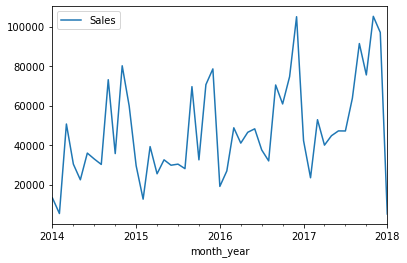

In [66]:
#Plot this (above) dataset

df2_grp = df2_grp.reset_index()
df2_grp.plot('month_year','Sales')

In [67]:
#Describe your analysis for the monthly revenue observations
#1. there was a sudden drop in sales from November 2014 to January 2015 and from December 2016 to February 2017
#2. December 2016 and November 2017 saw a peak in sales
Profile1 = ProfileReport(df2_grp, title='Monthly Sales/Revenue', html={'style':{'full_width':True}})
Profile1

## Task 5

In [68]:
#Create a column with Year field only give a suitable name to it
df['Year'] = pd.to_datetime(df['Ship Date']).dt.to_period('Y')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,price per unit,month_year,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,2016-11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,2016-11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,2016-06,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,2015-10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,2015-10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160,2014-01,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800,2017-03,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880,2017-03,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000,2017-03,2017


In [69]:
#Create a separate dataset from the data which will have two columns ,one which is created in step a of this task 
#and second the yearly sales revenue

df3_grp = pd.DataFrame(df.groupby('Year')['Sales'].sum())
df3_grp

,Sales
Year,
2014,470383.1931
2015,479442.5020
2016,611325.7530
2017,730889.7154
2018,5159.6968


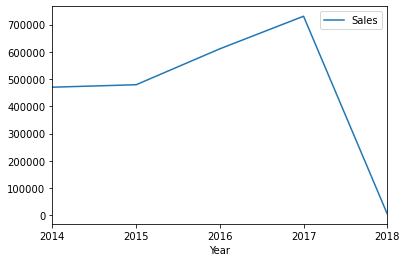

In [70]:
#Plot this dataset

df3_grp = df3_grp.reset_index()
df3_grp.plot('Year','Sales')

In [71]:
#Describe your analysis for the yearly revenue observations
#1. by the end of 2016 the sales were highest after a steady increase from 2015, then there was a sudden drop at the start of 2017 and sales drop drastically till 2018 
Profile2 = ProfileReport(df3_grp, title='Year Revenue', html={'style':{'full_width':True}})
Profile2

## Task 6

In [72]:
#Create a column in the monthly revenue dataset for monthly growth rate
df2_grp['Monthly growth rate'] = (((df2_grp['Sales']-df2_grp['Sales'].shift())/df2_grp['Sales'].shift())*100)
df2_grp

,month_year,Sales,Monthly growth rate
0,2014-01,13275.1310,NaN
1,2014-02,5406.5280,-59.273261
2,2014-03,50708.3490,837.909671
3,2014-04,30388.4650,-40.072068
4,2014-05,22478.8800,-26.028248
5,2014-06,35991.6556,60.113207
6,2014-07,32990.5940,-8.338215
7,2014-08,30245.2420,-8.321620
8,2014-09,73126.6533,141.779032
9,2014-10,35741.4770,-51.123872


In [73]:
#Find out the maximum monthly growth rate
column = df2_grp['Monthly growth rate']
max_value = column.max()
max_value

837.90967141944

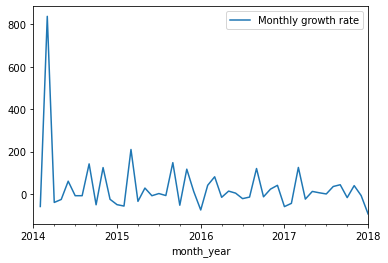

In [74]:
#Plot the findings
#1. March 2014 had the highest monthly growth rate
#2. Growth rate was remained constant March 2017 till December 2017
df2_grp.plot('month_year','Monthly growth rate')

In [75]:
#Describe the findings
Profile3 = ProfileReport(df2_grp, title='Year Revenue', html={'style':{'full_width':True}})
Profile3

## Task 7

In [76]:
#Create a new dataset including the product ids and total quantities sold for that id

df4_grp = pd.DataFrame(df.groupby('Product ID')['Quantity'].sum())
df4_grp

,Quantity
Product ID,
FUR-BO-10000112,9
FUR-BO-10000330,10
FUR-BO-10000362,14
FUR-BO-10000468,21
FUR-BO-10000711,12
...,...
TEC-PH-10004912,11
TEC-PH-10004922,19
TEC-PH-10004924,8


In [77]:
#Find out the most sold product from the created dataset
df4_grp[df4_grp.Quantity == df4_grp.Quantity.max()]

,Quantity
Product ID,
TEC-AC-10003832,75


## Task 8

In [78]:
#Create a dataset containing name and quantities bought

df5_grp = pd.DataFrame(df.groupby('Customer Name')['Quantity'].sum())
df5_grp

,Quantity
Customer Name,
Aaron Bergman,13
Aaron Hawkins,54
Aaron Smayling,48
Adam Bellavance,56
Adam Hart,75
...,...
Xylona Preis,100
Yana Sorensen,58
Yoseph Carroll,31


In [79]:
#Find out the customer name and quantity, who bought maximum in quantity
df5_grp[df5_grp.Quantity == df5_grp.Quantity.max()]

,Quantity
Customer Name,
Jonathan Doherty,150


## Task 9

In [80]:
#Create a dataset containing name and sales generated by him

df6_grp = pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())
df6_grp

,Sales
Customer Name,
Aaron Bergman,886.156
Aaron Hawkins,1744.700
Aaron Smayling,3050.692
Adam Bellavance,7755.620
Adam Hart,3250.337
...,...
Xylona Preis,2374.658
Yana Sorensen,6720.444
Yoseph Carroll,5454.350


In [81]:
#Find out the customer name and sales, who bought maximum in value
df6_grp[df6_grp.Sales == df6_grp.Sales.max()]

,Sales
Customer Name,
Sean Miller,25043.05


## Task 10

In [93]:
#Finding out the majority and minority customer cities on basis of number of customers
df7_grp = pd.DataFrame(df.groupby('City')['Customer Name'].count())
df7_grp['customer_count'] = pd.DataFrame(df.groupby('City')['Customer Name'].count())
print("City with maximum number of customers:")
print(df7_grp[df7_grp.customer_count == df7_grp.customer_count.max()])
print()
print("City with minimum number of customers:")
print(df7_grp[df7_grp.customer_count == df7_grp.customer_count.min()])


City with maximum number of customers:
               Customer Name  customer_count
City                                        
New York City            915             915

City with minimum number of customers:
                   Customer Name  customer_count
City                                            
Aberdeen                       1               1
Abilene                        1               1
Antioch                        1               1
Arlington Heights              1               1
Atlantic City                  1               1
...                          ...             ...
Vacaville                      1               1
Waterloo                       1               1
Waukesha                       1               1
Whittier                       1               1
Yucaipa                        1               1

[70 rows x 2 columns]


In [95]:
#Finding out the majority and minority customer cities on basis of Sales value

df8_grp = pd.DataFrame(df.groupby('City')['Sales'].sum())
print("City with maximum number of sales:")
print(df8_grp[df8_grp.Sales == df8_grp.Sales.max()])
print()
print("City with maximum number of sales:")
print(df8_grp[df8_grp.Sales == df8_grp.Sales.min()])

City with maximum number of sales:
                    Sales
City                     
New York City  256368.161

City with maximum number of sales:
         Sales
City          
Abilene  1.392


In [96]:
##Finding out the majority and minority customer cities on basis of number of quantity sold

df9_grp = pd.DataFrame(df.groupby('City')['Quantity'].sum())
print("City with maximum number of Quantity:")
print(df9_grp[df9_grp.Quantity == df9_grp.Quantity.max()])
print()
print("City with maximum number of Quantity:")
print(df9_grp[df9_grp.Quantity == df9_grp.Quantity.min()])

City with maximum number of Quantity:
               Quantity
City                   
New York City      3417

City with maximum number of Quantity:
             Quantity
City                 
Elyria              1
Iowa City           1
Jupiter             1
Lindenhurst         1
Littleton           1
Port Orange         1


## Task 11

In [85]:
# Find out the most and least sold product category from the store based on Value

df10_grp = pd.DataFrame(df.groupby('Category')['Sales'].sum())
print("Most sold product category based on value:")
print(df10_grp[df10_grp.Sales == df10_grp.Sales.max()])
print()
print("least sold product category based on value:")
print(df10_grp[df10_grp.Sales == df10_grp.Sales.min()])

Most sold product category based on value:
                 Sales
Category              
Technology  836154.033

least sold product category based on value:
                      Sales
Category                   
Office Supplies  719047.032


In [86]:
# Find out the most and least sold product category from the store based on Quantity

df11_grp = pd.DataFrame(df.groupby('Category')['Quantity'].sum())
print("Most sold product category based on Quantity:")
print(df11_grp[df11_grp.Quantity == df11_grp.Quantity.max()])
print()
print("least sold product category based on Quantity:")
print(df11_grp[df11_grp.Quantity == df11_grp.Quantity.min()])

Most sold product category based on Quantity:
                 Quantity
Category                 
Office Supplies     22906

least sold product category based on Quantity:
            Quantity
Category            
Technology      6939


## Task 12

In [87]:
# Find out the most and least sold product sub category from the store based on Value

df12_grp = pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())
print("Most sold product sub category based on value:")
print(df12_grp[df12_grp.Sales == df12_grp.Sales.max()])
print()
print("least sold product sub category based on value:")
print(df12_grp[df12_grp.Sales == df12_grp.Sales.min()])

Most sold product sub category based on value:
                   Sales
Sub-Category            
Phones        330007.054

least sold product sub category based on value:
                Sales
Sub-Category         
Fasteners     3024.28


In [88]:
# Find out the most and least sold product sub category from the store based on Quantity

df13_grp = pd.DataFrame(df.groupby('Sub-Category')['Quantity'].sum())
print("Most sold product sub category based on Quantity:")
print(df13_grp[df13_grp.Quantity == df13_grp.Quantity.max()])
print()
print("least sold product sub category based on Quantity:")
print(df13_grp[df13_grp.Quantity == df13_grp.Quantity.min()])

Most sold product sub category based on Quantity:
              Quantity
Sub-Category          
Binders           5974

least sold product sub category based on Quantity:
              Quantity
Sub-Category          
Copiers            234
